In [168]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [169]:
seed = 42
np.random.seed(seed)

In [170]:
mu = 2.5
std = 3
norm_rv = norm(mu, std)

In [171]:
N = 100
norm_rvs = norm_rv.rvs(N)
norm_rvs, len(norm_rvs)

(array([ 3.99014246,  2.0852071 ,  4.44306561,  7.06908957,  1.79753988,
         1.79758913,  7.23763845,  4.80230419,  1.09157684,  4.12768013,
         1.10974692,  1.10281074,  3.22588681, -3.23984073, -2.6747535 ,
         0.81313741, -0.53849336,  3.442742  , -0.22407223, -1.7369111 ,
         6.89694631,  1.8226711 ,  2.70258461, -1.77424456,  0.86685183,
         2.83276777, -0.95298073,  3.62709406,  0.69808393,  1.62491875,
         0.69488016,  8.05683455,  2.45950833, -0.67313279,  4.96763474,
        -1.16253095,  3.12659079, -3.37901037, -1.48455815,  3.09058371,
         4.71539974,  3.01410484,  2.15305515,  1.59668891, -1.93556597,
         0.34046737,  1.11808369,  5.67136668,  3.53085487, -2.78912047,
         3.47225191,  1.34475316,  0.469234  ,  4.33502887,  5.59299857,
         5.29384036, -0.01765257,  1.57236287,  3.49379029,  5.42663538,
         1.06247729,  1.94302307, -0.81900492, -1.08861987,  4.93757747,
         6.56872009,  2.28396964,  5.51059869,  3.5

In [172]:
mu_rvs = norm_rvs.mean()
var_rvs = norm_rvs.var()
mu_rvs, var_rvs

(2.1884604478177185, 7.348699752244723)

<Axes: >

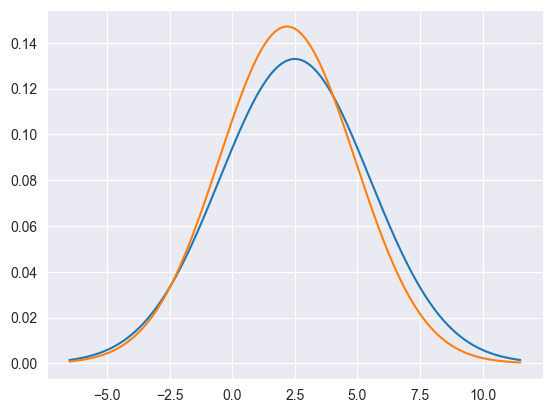

In [173]:
x = np.linspace(norm_rv.mean() - 3 * norm_rv.std(), norm_rv.mean() + 3 * norm_rv.std(), 1000)

sns.lineplot(x=x, y=norm_rv.pdf(x))
sns.lineplot(x=x, y=norm(norm_rvs.mean(), norm_rvs.std()).pdf(x))

In [174]:
bias = norm_rvs.mean() - norm_rv.mean()
mse = bias ** 2 + norm_rvs.var()
bias, mse

(-0.31153955218228147, 7.44575664481866)

In [175]:
alpha = 0.05
p_hat = norm_rvs.mean()
percentile = norm.ppf(1 - alpha / 2)  # Так как оценка параметра mu имеет стандартное нормальное распределение по ЦПТ
print(percentile)
p_d = norm_rvs.std()

ci_low = p_hat - percentile * (p_d / np.sqrt(N))
ci_high = p_hat + percentile * (p_d / np.sqrt(N))
ci_low, ci_high

1.959963984540054


(1.6571438991963414, 2.7197769964390957)

(1.6571438991963414, 2.7197769964390957)


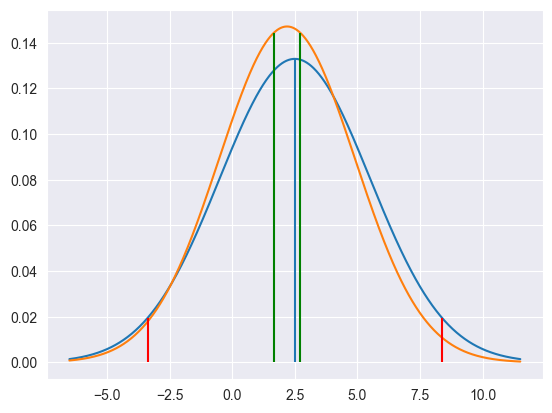

In [176]:
ci = stats.norm.interval(1 - alpha, norm_rvs.mean(), norm_rvs.std()/np.sqrt(N))
print(ci)
sns.lineplot(x=x, y=norm_rv.pdf(x))
sns.lineplot(x=x, y=norm(norm_rvs.mean(), norm_rvs.std()).pdf(x))
plt.vlines(x=ci[0], ymin=0, ymax=norm(norm_rvs.mean(), norm_rvs.std()).pdf(ci[0]), color='g')
plt.vlines(x=ci[1], ymin=0, ymax=norm(norm_rvs.mean(), norm_rvs.std()).pdf(ci[1]), color='g')
plt.vlines(x=norm_rv.ppf(alpha/2), ymin=0, ymax=norm_rv.pdf(norm_rv.ppf(alpha/2)), color='r')
plt.vlines(x=norm_rv.ppf(1 - alpha/2), ymin=0, ymax=norm_rv.pdf(norm_rv.ppf(1 - alpha/2)), color='r')
plt.vlines(x=norm_rv.mean(), ymin=0, ymax=norm_rv.pdf(norm_rv.mean()))